# Normal regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(45)
x = 2 + 90 * np.random.randn(500)

In [3]:
y = 5 * x + 3 * (x ** 2) + np.random.randn(500)

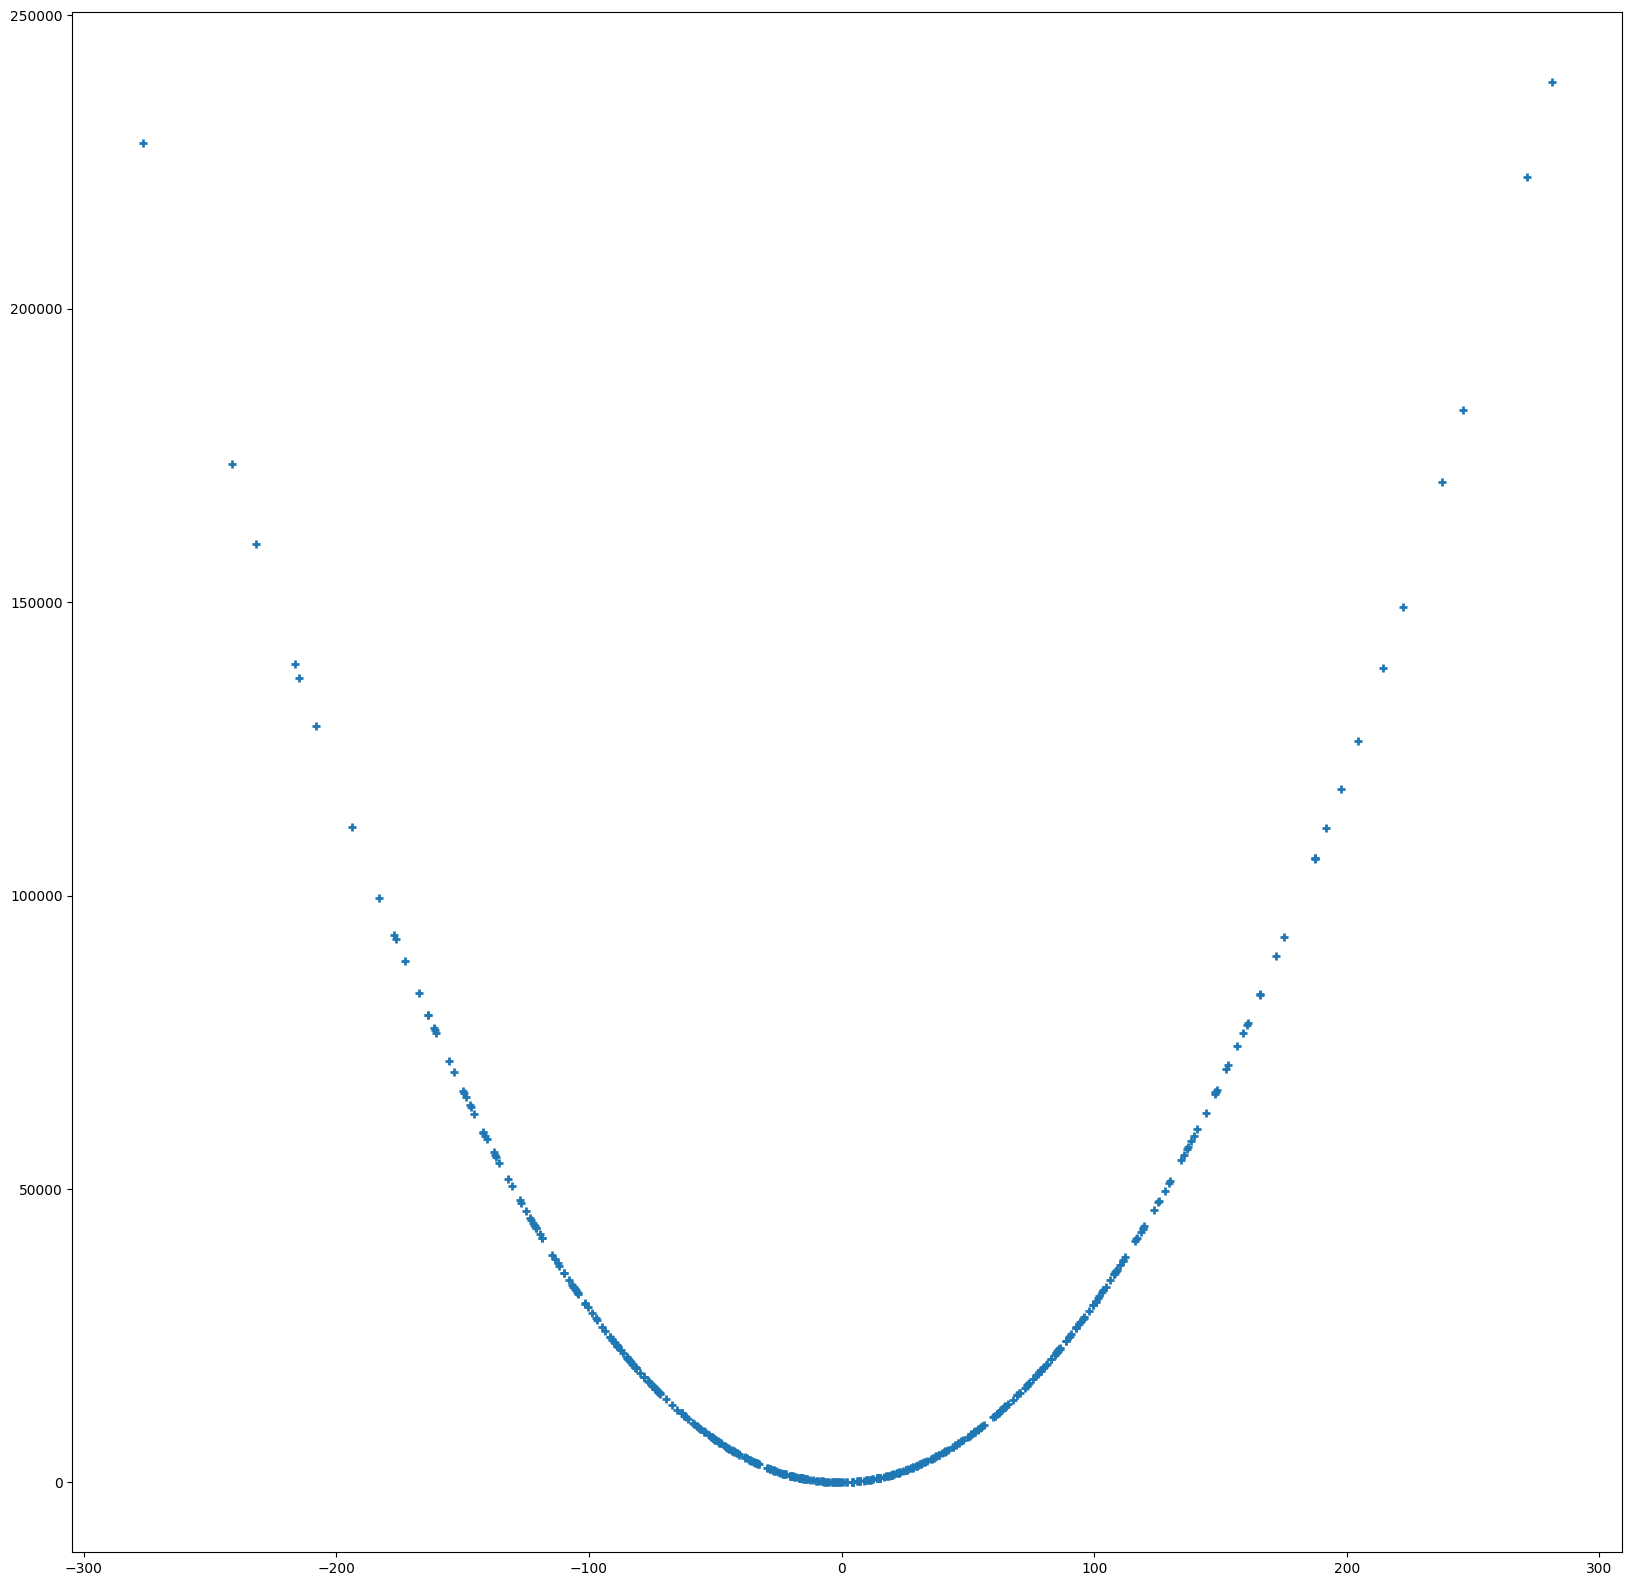

In [17]:
plt.figure(figsize = (20, 20))
plt.scatter(x,y, marker = '+', linewidth = 2)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [6]:
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
score = r2_score(y_test, reg.predict(X_test.reshape(-1,1)))
score

-0.00744776383275636

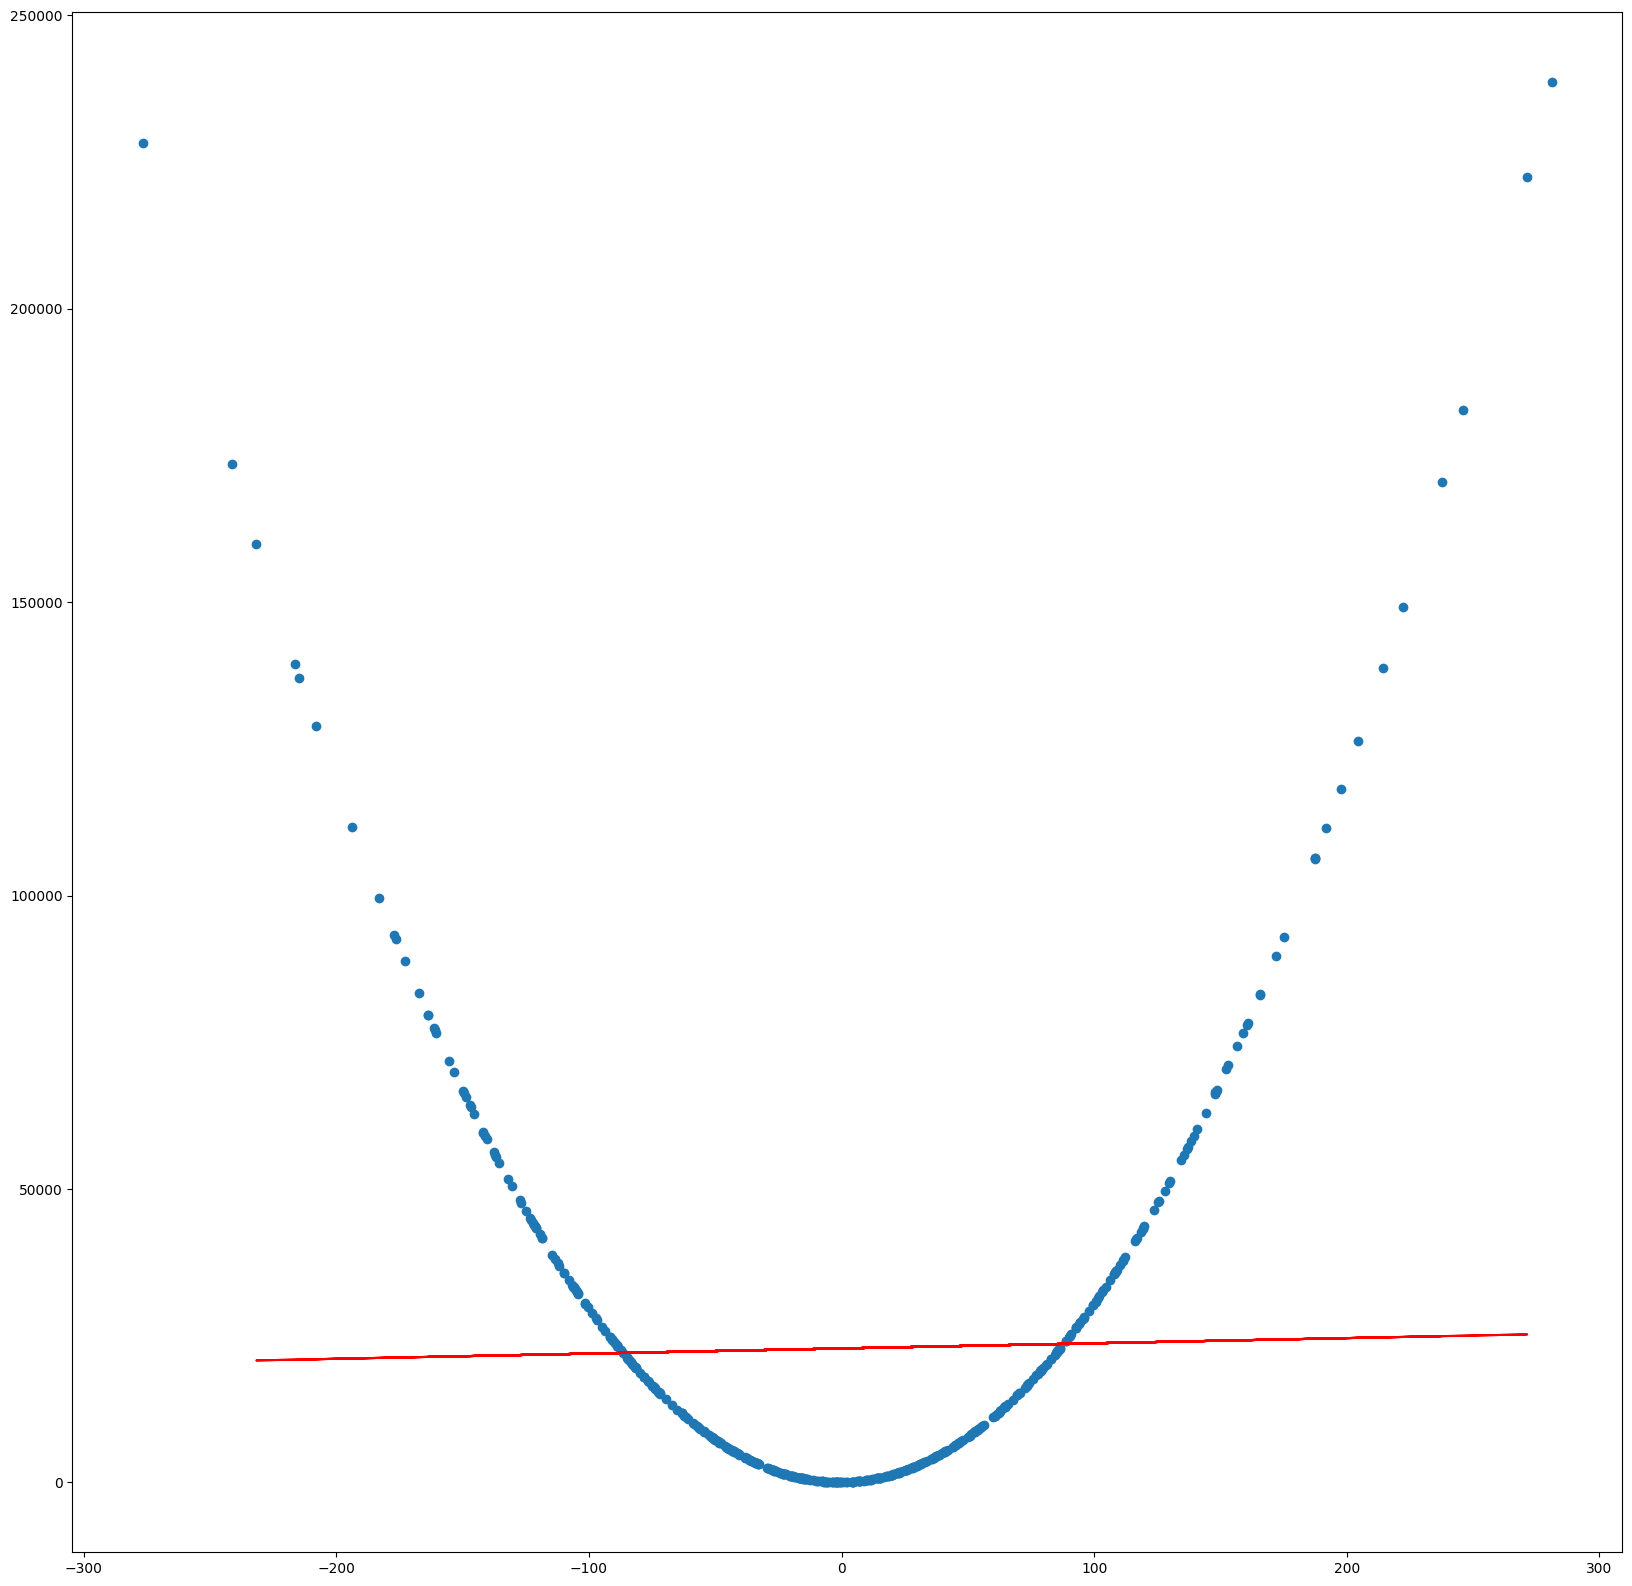

In [7]:
plt.figure(figsize = (20, 20))
plt.scatter(x,y)
plt.plot(X_test, reg.predict(X_test.reshape(-1,1)).ravel(), color = 'red')
plt.show()

# using polynomial regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree = 2)

In [10]:
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))
X_test_poly = poly.fit_transform(X_test.reshape(-1,1))

In [11]:
reg2 = LinearRegression()
reg2.fit(X_train_poly, y_train)

LinearRegression()

In [12]:
poly_r2_score = r2_score(y_test, reg2.predict(X_test_poly))

In [13]:
poly_r2_score

0.9999999993581017

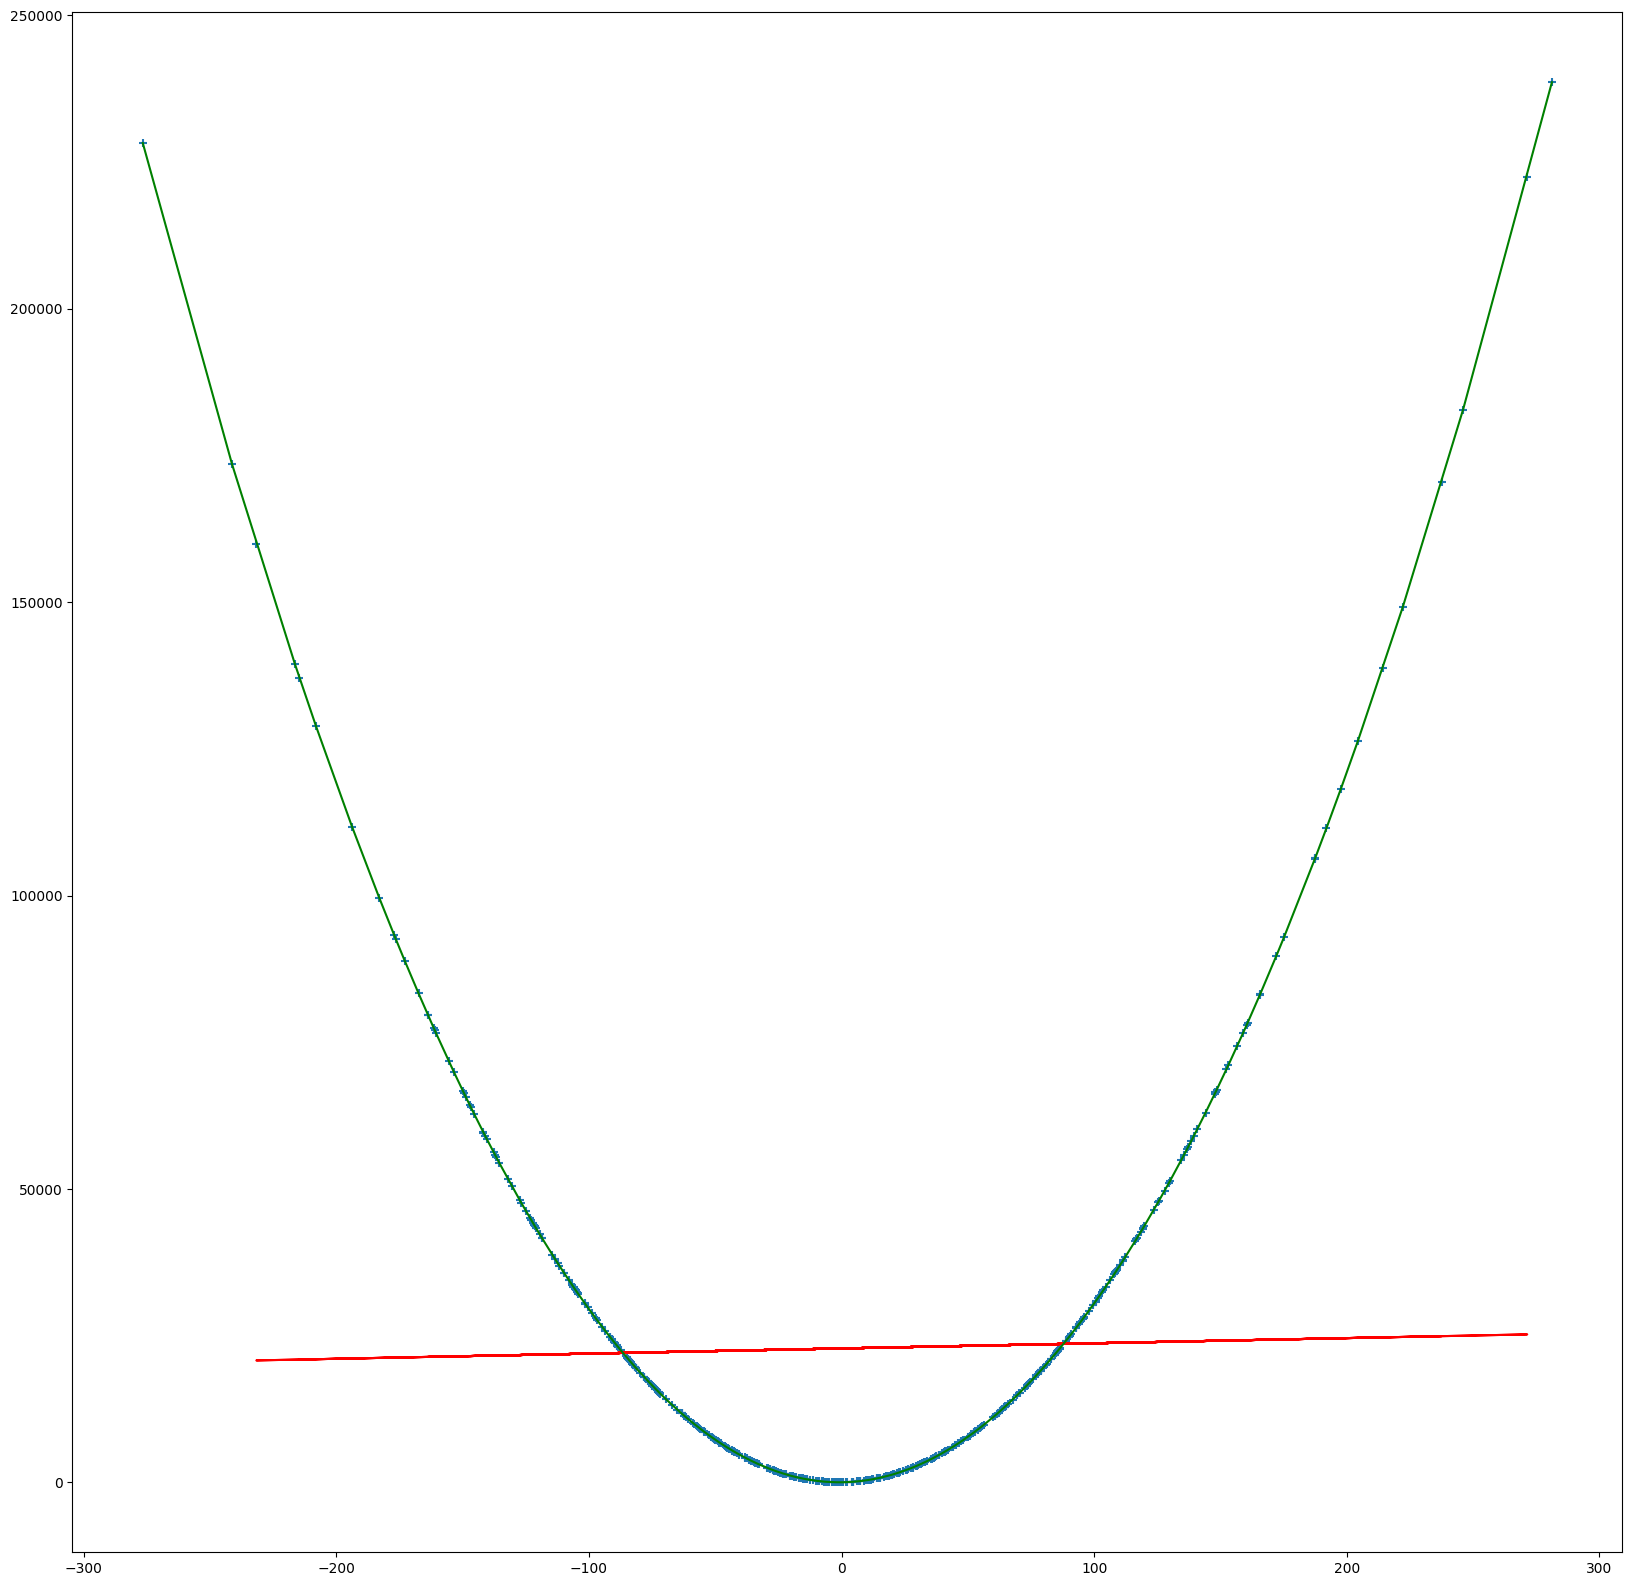

In [14]:
plt.figure(figsize = (20, 20))
plt.scatter(x,y, marker = '+')
plt.plot(X_test, reg.predict(X_test.reshape(-1,1)).ravel(), color = 'red')
plt.plot(sorted(X_train), reg2.predict(poly.fit_transform(np.array(sorted(X_train)).reshape(-1,1))), color = 'green')
plt.show()